### Audio Feature Analysis

The goal of this analysis is to 'map out' regions whose activity tracks with the RMSE of the speech soundtrack.
This script will load a variable 'resampled_audio_feature', which contains the time-varying RMSE (roughly, the sound energy) as a variable. This variable has been resampled to match the temporal resolution of fMRI (because speech is much faster). Moreover, when we correlate this audio-feature against the fmri-data, we will account for the time-delay between the sound and the fMRI response (so-called hemodynamic lag).

In [114]:
import re, sys
import nilearn
from nilearn import plotting, input_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load relevant data

1. extracted audiofeature (RMSE)
2. extracted fMRI data

In [115]:
resampled_audio_feature = np.load('../data_pieman/resampled_audio_feature.npy')
print(resampled_audio_feature.shape)

fmri_data = np.load('../data_pieman/fmri_data_pieman.npy')
print(fmri_data.shape)

print(fmri_data.shape)

(300,)
(68, 300, 293)
(68, 300, 293)


### Group-average the fMRI data

In [116]:
resmat_all = np.nanmean(fmri_data, axis = 0)
resmat_all.shape

(300, 293)

In [117]:
#plt.figure(figsize = (20,2))
#plt.plot(resampled_audio_feature)


### Correlate the time-varying audio-feature against the neural measuements (for each region)

In [131]:
res = []
tr_shift = 3

for i in range(268):
    res.append(np.corrcoef(resmat_all[tr_shift:,i], resampled_audio_feature[:-tr_shift])[0,1])
    
#plt.plot(res);

print(np.argmax(res))

print(np.max(res))

162
0.3539958651763675


### Load the brain parcellation to visualize the results

In [132]:
shen_file       = '../data_pieman/shen_2mm_268_parcellation.nii'
'''
nilearn.plotting.plot_roi(shen_file, 
                  annotate = False, 
                  cut_coords = (5,0,0),
                  cmap = 'prism',
                  draw_cross = False, 
                  #title= 'Shen-268-node parcellation',
                 );'''
shen_masker = nilearn.input_data.NiftiLabelsMasker(labels_img=shen_file);

sample_file = '../data_pieman/func.nii'
shen_masker.fit_transform(sample_file);

### Threshold the results and visualize: Which brain regions track with the audio-feature?

(1, 268)


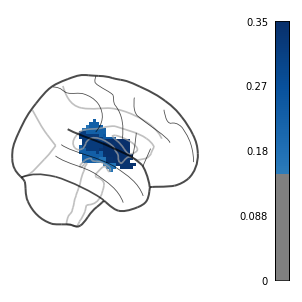

In [133]:
res = np.asarray(res)
res[res < 0.1] = 0

r2 = np.reshape(res, (1,268))
print(r2.shape)

res_img = shen_masker.inverse_transform(r2);
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=True, 
                          cmap="Blues", 
                          threshold=0.15,
                          plot_abs=False, 
                          display_mode='x',
                          figure=plt.figure(figsize=(4, 4)));

### For comparison: Brain regions involved in "all things auditory" (from NeuroSynth.org)

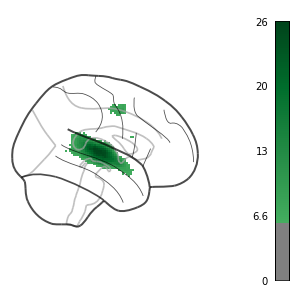

In [134]:
plotting.plot_glass_brain('../data_pieman/auditory_association-test_z_FDR_0.01.nii.gz', 
                          colorbar=True, 
                          cmap = 'Greens',
                          threshold=6.15,
                          plot_abs=True, 
                          display_mode='x',
                          figure=plt.figure(figsize=(4, 4)));

### heap

In [80]:
#res_img = shen_masker.inverse_transform(r2);
#view = nilearn.plotting.view_img(  nilearn.image.index_img(res_img,0), 
#                                     threshold = 0.0, 
#                                     vmax = 0.2, 
#                              );
#view

In [81]:
#view = nilearn.plotting.view_img(  '../data_pieman/auditory_association-test_z_FDR_0.01.nii.gz', 
#                                     threshold = 0.0, 
#                                     #vmax = 0.2, 
#                              );
#view

In [86]:
resmat_all.shape

(300, 293)

In [90]:
from scipy.stats import zscore

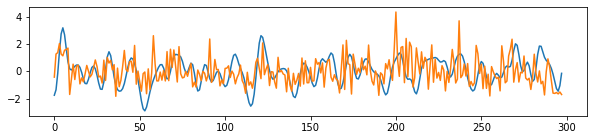

In [93]:
plt.figure(figsize = (10,2))
plt.plot(zscore(resmat_all[2:,162]));
plt.plot(zscore(resampled_audio_feature[:-2]));

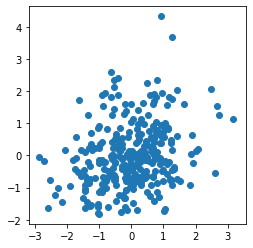

In [96]:
plt.scatter(zscore(resmat_all[2:,162]),
            zscore(resampled_audio_feature[:-2]));
plt.axis('square');